In [207]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
img = cv2.imread('dataset/Celebrity Faces Dataset/Brad Pitt/087_155f1f74.jpg')

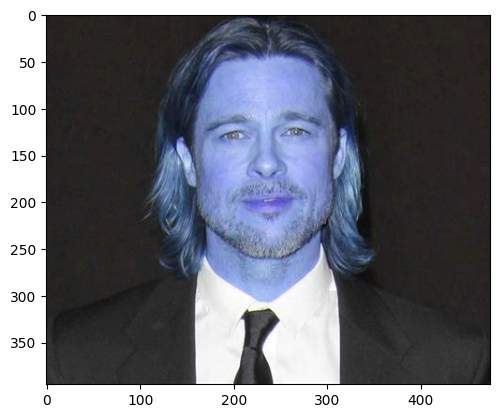

In [209]:
plt.imshow(img)

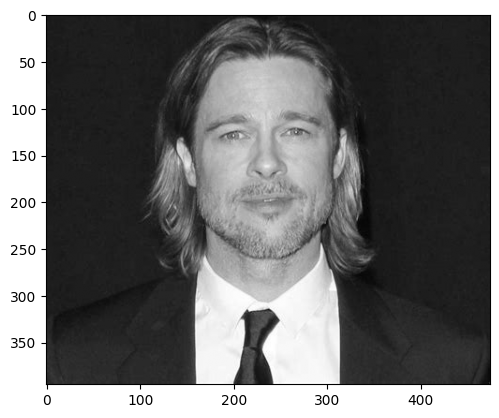

In [210]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow((gray_img), cmap='gray')

In [211]:
eyes_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
faces_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

In [212]:
# face = faces_cascade.detectMultiScale(gray_img)
# x, y, w, h = face[0]
# img_face = cv2.rectangle(gray_img, (x, y), (x + w, y + h), (255, 0, 0), 3)

# plt.imshow(img_face, cmap='gray')


In [213]:
# eyes = eyes_cascade.detectMultiScale(gray_img)
# for (ex, ey, ew, eh) in eyes:
#     img_eye = cv2.rectangle(gray_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 3)
# plt.imshow(img_eye)

In [214]:
cv2.destroyAllWindows()

In [215]:
def detect_face_and_eyes(path):
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    faces = faces_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x, y, w, h) in faces:
        img_face = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
        cropped_gray = gray_img[y:y + h, x:x + w]
        cropped_face = img_face[y:y + h, x:x + w]

        eyes = eyes_cascade.detectMultiScale(cropped_gray)
        if len(eyes) >= 2:
            return cropped_face
    

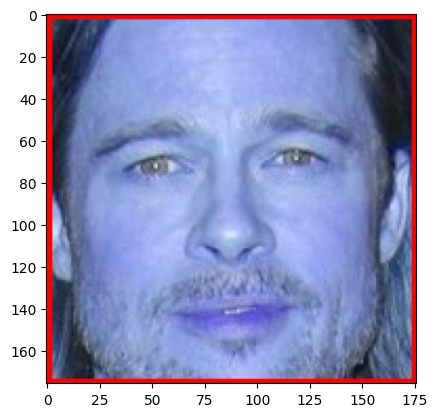

In [216]:
cropped_face = detect_face_and_eyes('dataset/Celebrity Faces Dataset/Brad Pitt/087_155f1f74.jpg')
plt.imshow(cropped_face)

In [217]:
dataset_path = './dataset/Celebrity Faces Dataset/'
cleaned_data_path = './cleaned_data/' 

In [218]:
import os
folder = []
for name in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, name)):
        folder.append(dataset_path+name)

In [219]:
folder

['./dataset/Celebrity Faces Dataset/Angelina Jolie',
 './dataset/Celebrity Faces Dataset/Brad Pitt',
 './dataset/Celebrity Faces Dataset/Denzel Washington',
 './dataset/Celebrity Faces Dataset/Hugh Jackman',
 './dataset/Celebrity Faces Dataset/Jennifer Lawrence',
 './dataset/Celebrity Faces Dataset/Johnny Depp',
 './dataset/Celebrity Faces Dataset/Kate Winslet',
 './dataset/Celebrity Faces Dataset/Leonardo DiCaprio',
 './dataset/Celebrity Faces Dataset/Megan Fox',
 './dataset/Celebrity Faces Dataset/Natalie Portman',
 './dataset/Celebrity Faces Dataset/Nicole Kidman',
 './dataset/Celebrity Faces Dataset/Robert Downey Jr',
 './dataset/Celebrity Faces Dataset/Sandra Bullock',
 './dataset/Celebrity Faces Dataset/Scarlett Johansson',
 './dataset/Celebrity Faces Dataset/Tom Cruise',
 './dataset/Celebrity Faces Dataset/Tom Hanks',
 './dataset/Celebrity Faces Dataset/Will Smith']

In [246]:
import shutil
if os.path.exists(cleaned_data_path):
    shutil.rmtree(cleaned_data_path)
os.makedirs(cleaned_data_path)

In [247]:
cropped_path = []
celeb_directories = {}

for celebrity_folder in folder:
    celeb_name = celebrity_folder.split('/')[-1]
    print("Processing images of:", celeb_name)
    if not os.path.exists(cleaned_data_path+celeb_name):
        os.makedirs(cleaned_data_path+celeb_name)
    count = 0
    for img_name in os.listdir(celebrity_folder):
        img_path = celebrity_folder + '/' + img_name
        cropped_face = detect_face_and_eyes(img_path)

        if cropped_face is not None:
            path_to_save = cleaned_data_path + celeb_name+'/' + celeb_name + str(count)+".png"
            cropped_path.append(path_to_save)
            cv2.imwrite(path_to_save, cropped_face)
            count += 1
    celeb_directories[celeb_name] = cropped_path
    cropped_path = []
        
   

Processing images of: Angelina Jolie
Processing images of: Brad Pitt
Processing images of: Denzel Washington
Processing images of: Hugh Jackman
Processing images of: Jennifer Lawrence
Processing images of: Johnny Depp
Processing images of: Kate Winslet
Processing images of: Leonardo DiCaprio
Processing images of: Megan Fox
Processing images of: Natalie Portman
Processing images of: Nicole Kidman
Processing images of: Robert Downey Jr
Processing images of: Sandra Bullock
Processing images of: Scarlett Johansson
Processing images of: Tom Cruise
Processing images of: Tom Hanks
Processing images of: Will Smith


In [251]:
len(celeb_directories)

17